# AAPL Price Prediction using MLPRegressor
This notebook fetches AAPL data from Yahoo Finance, prepares the data, trains an MLPRegressor model, and plots the results.

In [21]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [28]:
# Download AAPL data
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2025-07-31'
data = yf.download(ticker, start=start_date, end=end_date)


/var/folders/5z/4d37vf3j0_zcmwxg66l_bmm80000gn/T/ipykernel_42753/4142505350.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [29]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288578,24.757332,23.848704,24.746224,212818400
2015-01-05,23.604338,24.137518,23.417725,24.057541,257142000
2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
2015-01-08,24.857313,24.915075,24.148627,24.266372,237458000
...,...,...,...,...,...
2025-07-24,213.759995,215.690002,213.529999,213.899994,46022600
2025-07-25,213.880005,215.240005,213.399994,214.699997,40268800


In [30]:
data.columns = data.columns.droplevel('Ticker')

In [31]:
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.288578,24.757332,23.848704,24.746224,212818400
2015-01-05,23.604338,24.137518,23.417725,24.057541,257142000
2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
2015-01-08,24.857313,24.915075,24.148627,24.266372,237458000
...,...,...,...,...,...
2025-07-24,213.759995,215.690002,213.529999,213.899994,46022600
2025-07-25,213.880005,215.240005,213.399994,214.699997,40268800
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000


In [79]:
# Prepare features and target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [80]:
X

Price,Open,High,Low,Volume
Date,,,,
2015-01-02,24.746224,24.757332,23.848704,212818400
2015-01-05,24.057541,24.137518,23.417725,257142000
2015-01-06,23.668756,23.866477,23.244433,263188400
2015-01-07,23.815383,24.037541,23.704304,160423600
2015-01-08,24.266372,24.915075,24.148627,237458000
...,...,...,...,...
2025-07-24,213.899994,215.690002,213.529999,46022600
2025-07-25,214.699997,215.240005,213.399994,40268800
2025-07-28,214.029999,214.850006,213.059998,37858000


In [81]:
y

Date
2015-01-02     24.288578
2015-01-05     23.604338
2015-01-06     23.606552
2015-01-07     23.937571
2015-01-08     24.857313
                 ...    
2025-07-24    213.759995
2025-07-25    213.880005
2025-07-28    214.050003
2025-07-29    211.270004
2025-07-30    209.050003
Name: Close, Length: 2659, dtype: float64

In [82]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [83]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2127, 532, 2127, 532)

In [98]:
# Train MLPRegressor
model = MLPRegressor(
    hidden_layer_sizes=(15, 5),
    max_iter=500,
    random_state=42, 
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute errors on the entire test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error  (MSE): {mse:.4f}")

Mean Absolute Error (MAE): 75.1237
Mean Squared Error  (MSE): 9198.8526


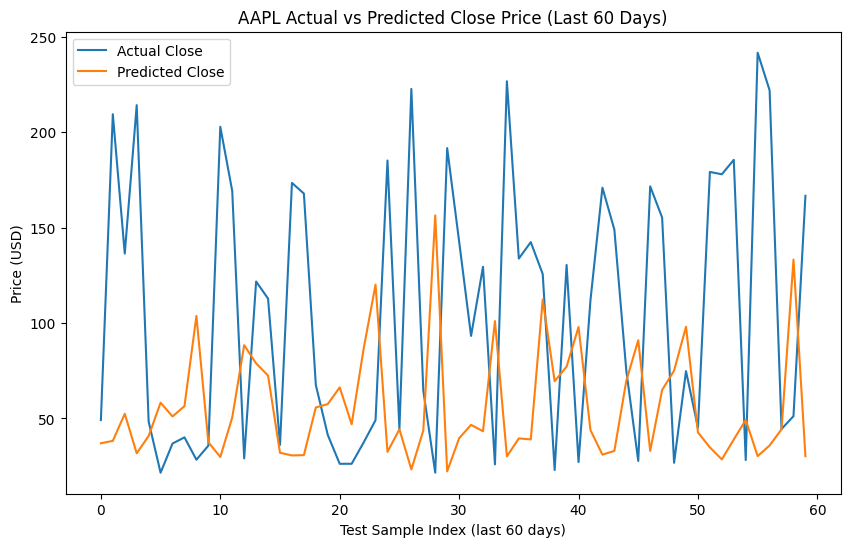

In [100]:
# Now plot only the last 60 days
n_days = 60
y_test_last = y_test.values[-n_days:]
y_pred_last = y_pred[-n_days:]

plt.figure(figsize=(10, 6))
plt.plot(y_test_last, label='Actual Close')
plt.plot(y_pred_last, label='Predicted Close')
plt.title(f"AAPL Actual vs Predicted Close Price (Last {n_days} Days)")
plt.xlabel("Test Sample Index (last 60 days)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()